In [17]:
from constants import DATA_PATH
import pandas as pd


file = pd.ExcelFile(DATA_PATH / 'sentinel-1.xlsx')

In [18]:
dfs = [pd.read_excel(DATA_PATH / 'sentinel-1.xlsx', sheet_name=s) for s in file.sheet_names if s != 'UniqueCrops']

df = pd.concat(dfs).dropna()

df

,Sample Date & Time,Sample Id (Grid),Latitude (Centre of grid),Longitude (Centre of grid),VH-pol,VV-pol,SM1 (%),Crop Name
0,2022-06-18 00:00:00,1A,22.526048,72.765011,-19.3557,-13.54610,4.6,Fallow
1,2022-06-18 00:00:00,1B,22.525481,72.765028,-17.1605,-10.46910,7.2,Pearl Millet
2,2022-06-18 00:00:00,1C,22.525423,72.765663,-17.8729,-9.98927,6.4,Fallow
3,2022-06-18 00:00:00,1D,22.525999,72.765663,-17.7906,-11.93460,9.6,Lemon
4,2022-06-18 00:00:00,1E,22.525563,72.765399,-17.3646,-10.73270,3.9,Fallow
...,...,...,...,...,...,...,...,...
135,2023-03-19 00:00:00,28A,22.523697,72.767969,-16.7871,-11.17010,50.0,Wheat
136,2023-03-19 00:00:00,28B,22.523710,72.768582,-17.2167,-12.15740,50.0,Wheat
137,2023-03-19 00:00:00,28C,22.524262,72.768629,-17.7785,-10.37820,50.0,Tobacco
138,2023-03-19 00:00:00,28D,22.524252,72.767989,-16.6607,-10.62890,50.0,Tobacco


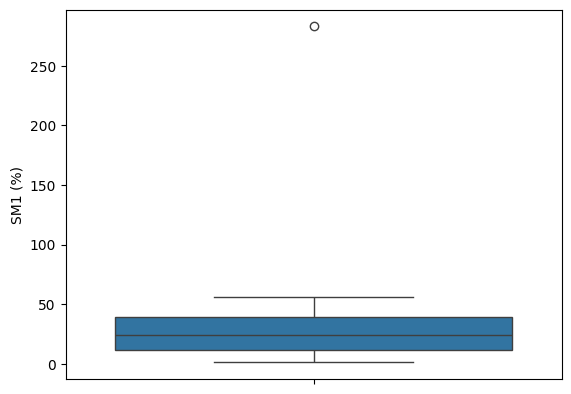

In [19]:
import seaborn as sns

sns.boxplot(df['SM1 (%)']);

In [20]:
df.sort_values(by='SM1 (%)', ascending=False)

,Sample Date & Time,Sample Id (Grid),Latitude (Centre of grid),Longitude (Centre of grid),VH-pol,VV-pol,SM1 (%),Crop Name
91,2023-02-11 00:00:00,19B,22.505581,72.764064,-15.5062,-9.85398,283.0,Wheat
22,2023-01-30 00:00:00,5C,22.527168,72.759822,-16.5729,-11.91910,56.4,Wheat
2,2022-09-20 00:00:00,1C,22.525423,72.765663,-15.2878,-11.53430,54.7,Paddy
42,2023-02-11 00:00:00,9C,22.528473,72.747142,-15.6903,-10.08190,53.8,Wheat
17,2022-08-27 00:00:00,4C,22.525355,72.760222,-15.2550,-10.84050,52.5,Paddy
...,...,...,...,...,...,...,...,...
30,2022-12-13 00:00:00,7A,22.527958,72.750395,-18.1225,-11.24840,1.4,Fallow
96,2022-11-19 00:00:00,20B,22.504650,72.763111,-18.4282,-11.39890,1.4,Fallow
115,2022-06-18 00:00:00,24A,22.514666,72.762935,-18.6002,-11.19860,1.3,Fallow
90,2022-11-19 00:00:00,19A,22.505576,72.763430,-16.4145,-10.40410,1.2,Fallow


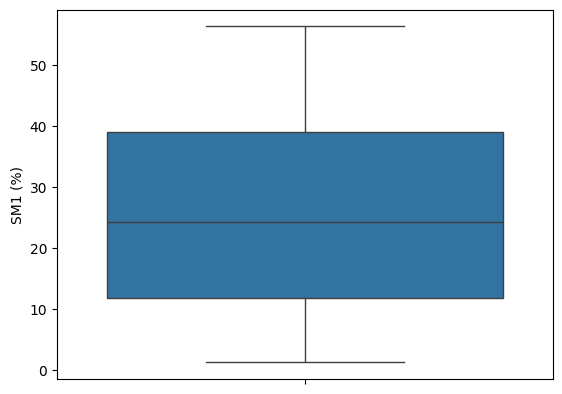

In [21]:
df = df[df['SM1 (%)'] < 100]

sns.boxplot(df['SM1 (%)']);

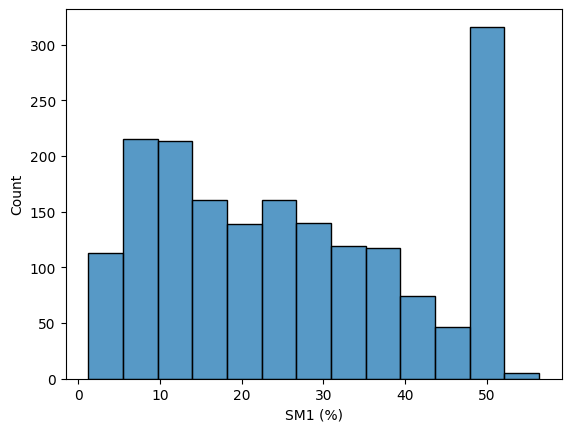

In [22]:
sns.histplot(df['SM1 (%)']);

In [ ]:
df = df.assign(label=pd.qcut(df['SM1 (%)'], q=4, retbins=False, labels=['Low', 'Medium', 'High', 'Very High']))

In [24]:
df['Sample Date & Time'].unique()

array([Timestamp('2022-06-18 00:00:00'), Timestamp('2022-06-28 00:00:00'),
       Timestamp('2022-07-22 00:00:00'), Timestamp('2022-08-27 00:00:00'),
       Timestamp('2022-09-08 00:00:00'), Timestamp('2022-09-20 00:00:00'),
       'WQ3E', datetime.datetime(2022, 10, 14, 0, 0),
       Timestamp('2022-11-19 00:00:00'), Timestamp('2022-12-13 00:00:00'),
       Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-30 00:00:00'),
       Timestamp('2023-02-11 00:00:00'), Timestamp('2023-03-07 00:00:00'),
       Timestamp('2023-03-19 00:00:00')], dtype=object)

In [25]:
df = df[df['Sample Date & Time'] != 'WQ3E']

In [26]:
file.sheet_names

['16-06-2022',
 '28-06-2022',
 '22-07-2022',
 '27-08-2022',
 '08-09-2022',
 '20-09-2022',
 '14-10-2022',
 '19-11-2022 ',
 '13-12-2022',
 '18-01-2023',
 '30-01-2023',
 '11-02-2023 ',
 '07-03-2023',
 '19-03-2023',
 'UniqueCrops']

In [27]:
for ts in df['Sample Date & Time'].unique():
    print(ts)

2022-06-18 00:00:00
2022-06-28 00:00:00
2022-07-22 00:00:00
2022-08-27 00:00:00
2022-09-08 00:00:00
2022-09-20 00:00:00
2022-10-14 00:00:00
2022-11-19 00:00:00
2022-12-13 00:00:00
2023-01-18 00:00:00
2023-01-30 00:00:00
2023-02-11 00:00:00
2023-03-07 00:00:00
2023-03-19 00:00:00


Found 14 unique timestamps. Setting up plot grid...
Generating subplots...


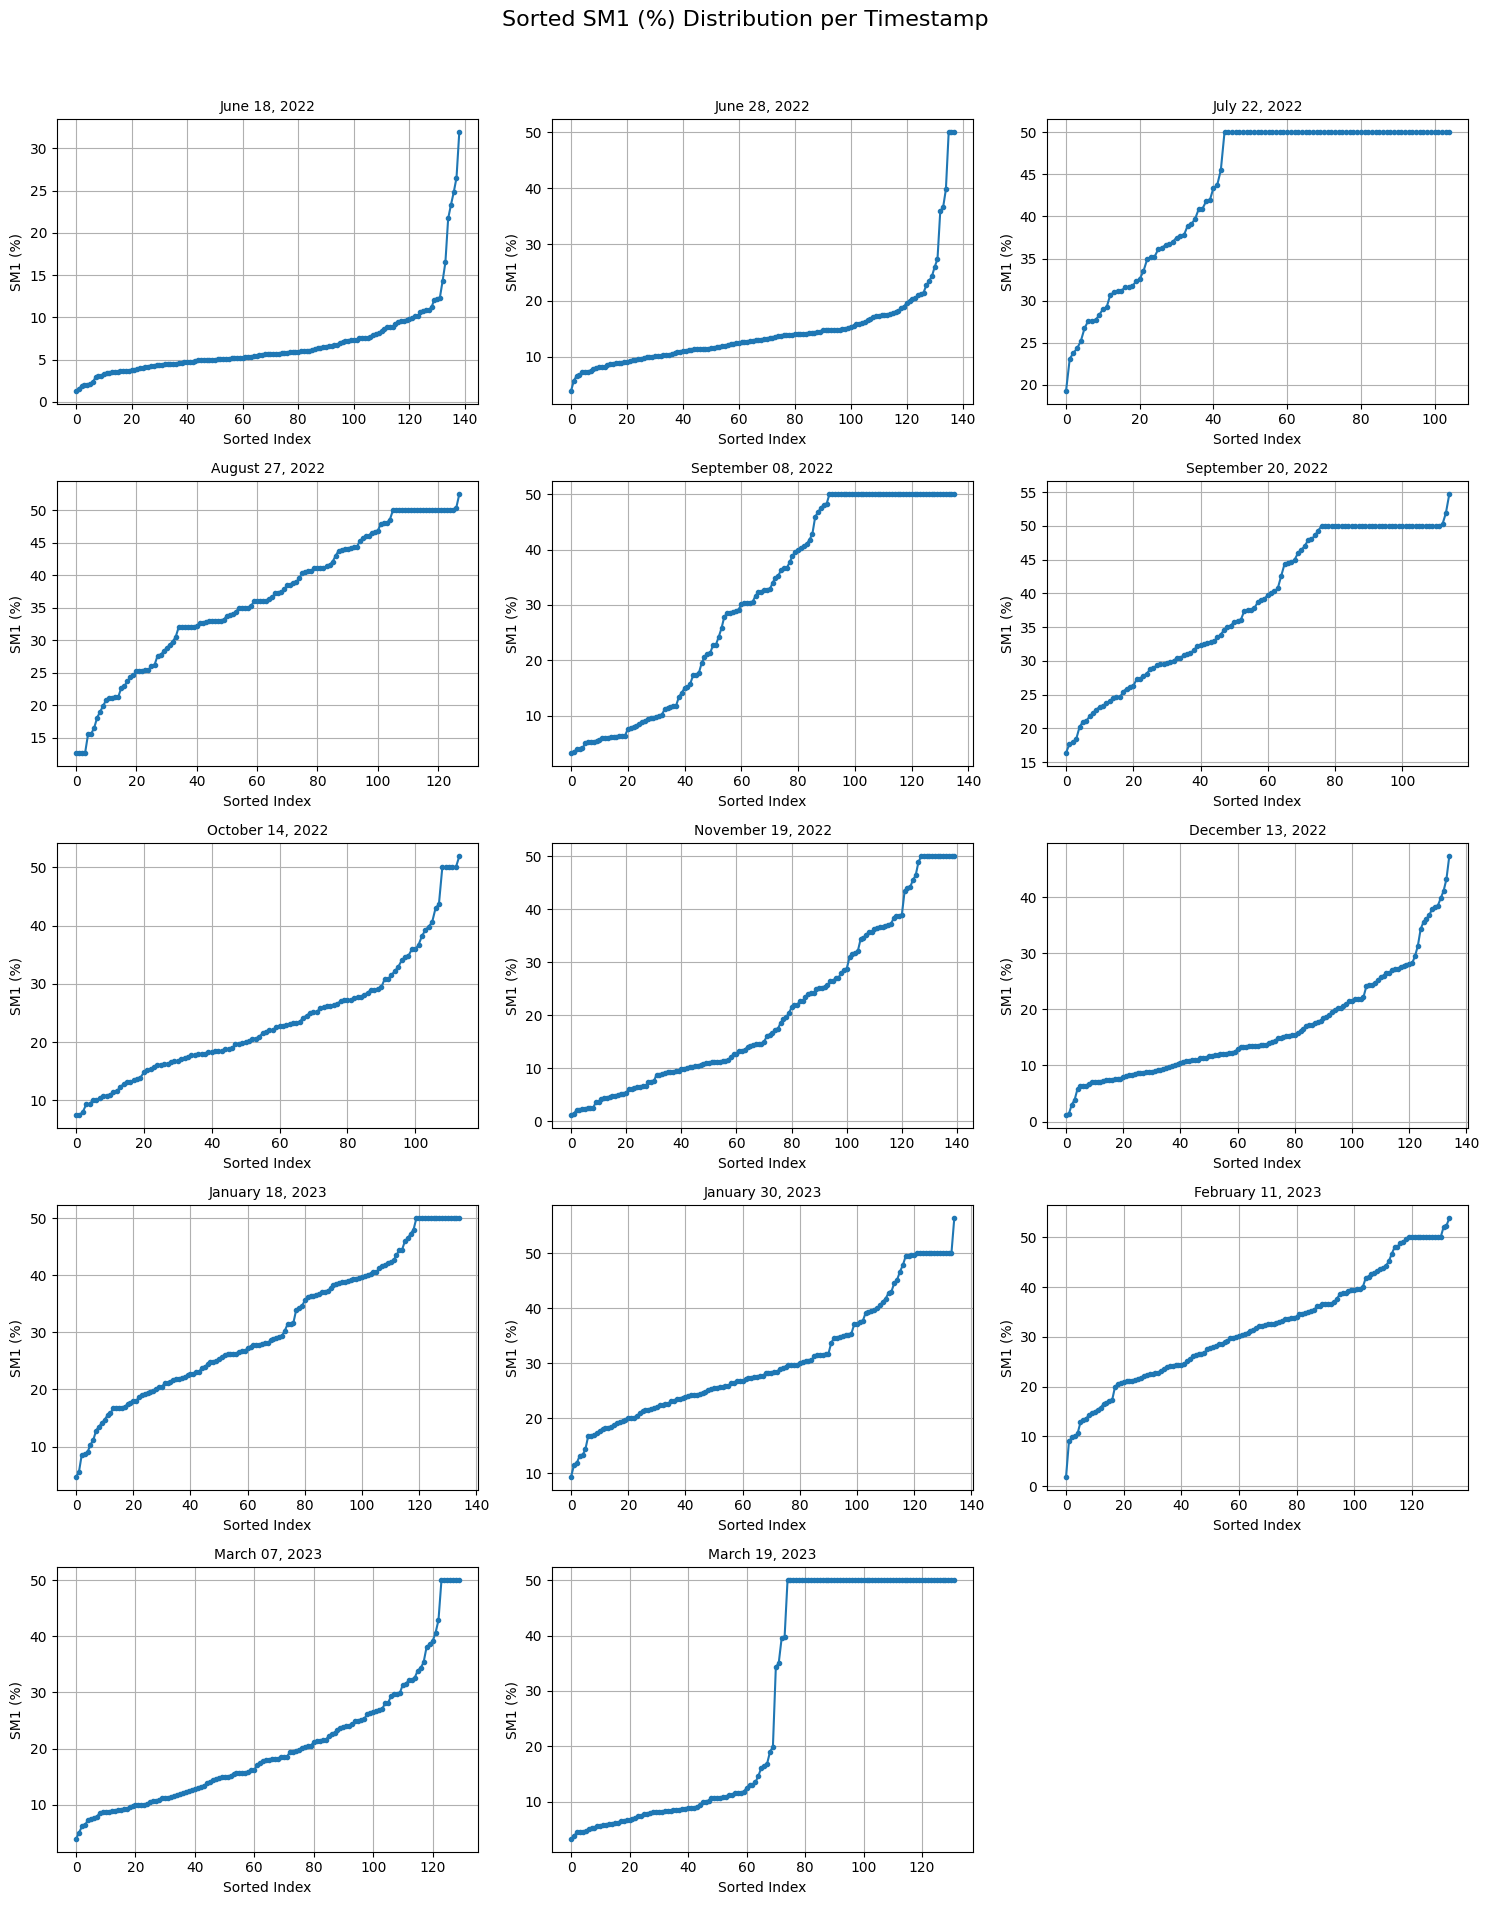

In [28]:
import matplotlib.pyplot as plt

unique_timestamps = sorted(df['Sample Date & Time'].unique())
n_timestamps = len(unique_timestamps)

print(f"Found {n_timestamps} unique timestamps. Setting up plot grid...")

ncols = 3
nrows = (n_timestamps + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

axes_flat = axes.flatten()

print("Generating subplots...")
for i, ts in enumerate(unique_timestamps):
    ax = axes_flat[i] # Get the current subplot
    
    df_timestamp = df[df['Sample Date & Time'] == ts]
    
    sm_values = df_timestamp['SM1 (%)']
    
    sm_plottable = sm_values.sort_values().reset_index(drop=True)
    
    ax.plot(sm_plottable.index, sm_plottable.values, marker='.', linestyle='-')
    
    ax.set_title(f"{pd.to_datetime(ts).strftime('%B %d, %Y')}", fontsize=10)
    ax.set_xlabel("Sorted Index")
    ax.set_ylabel("SM1 (%)")
    ax.grid(True)

for j in range(n_timestamps, nrows * ncols):
    axes_flat[j].axis('off')

fig.suptitle('Sorted SM1 (%) Distribution per Timestamp', fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect to make space for suptitle

plt.show()

<Axes: ylabel='SM1 (%)'>

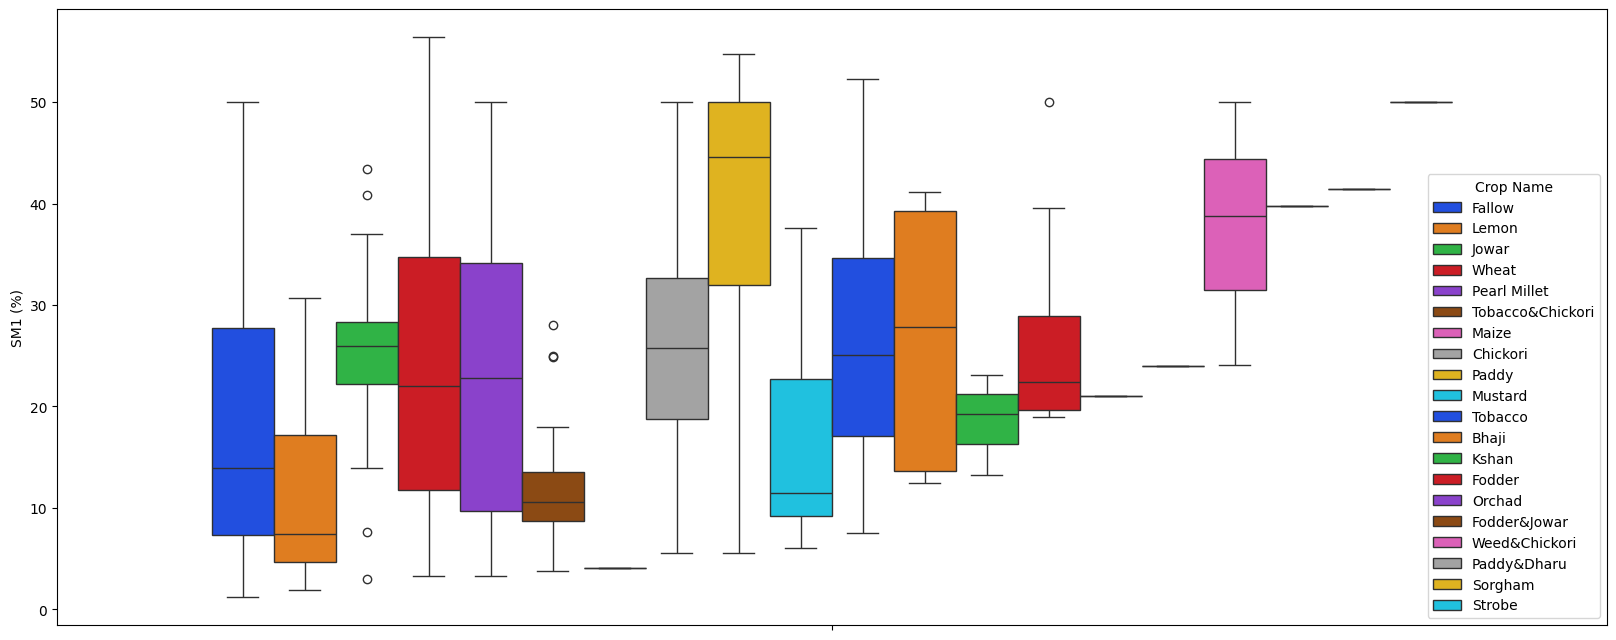

In [29]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df.sort_values(by='SM1 (%)'), y='SM1 (%)', hue='Crop Name', palette='bright')

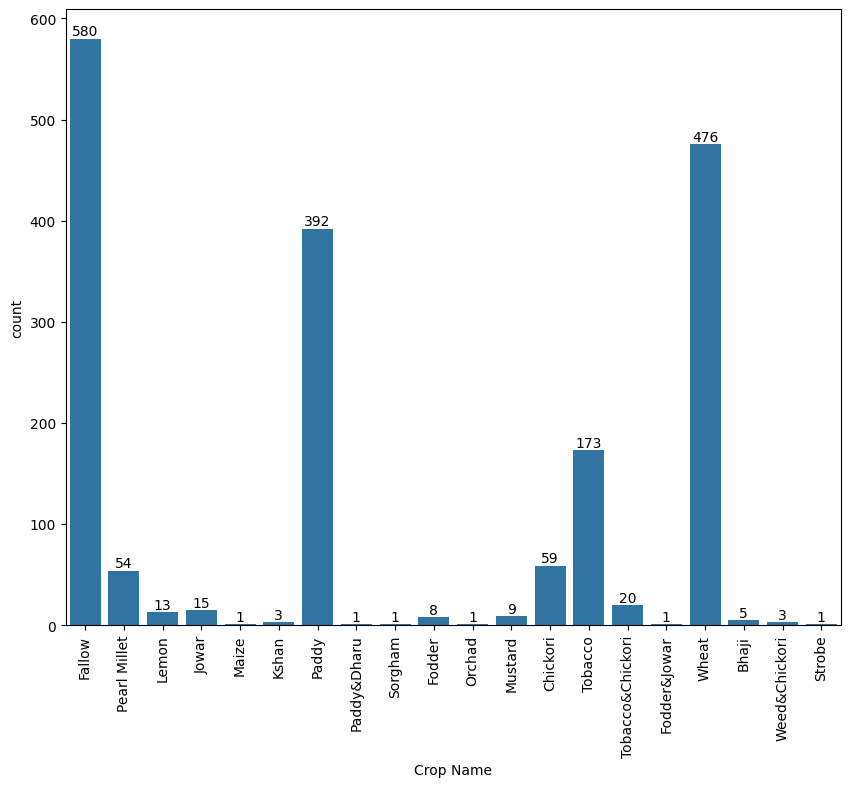

In [30]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Crop Name')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

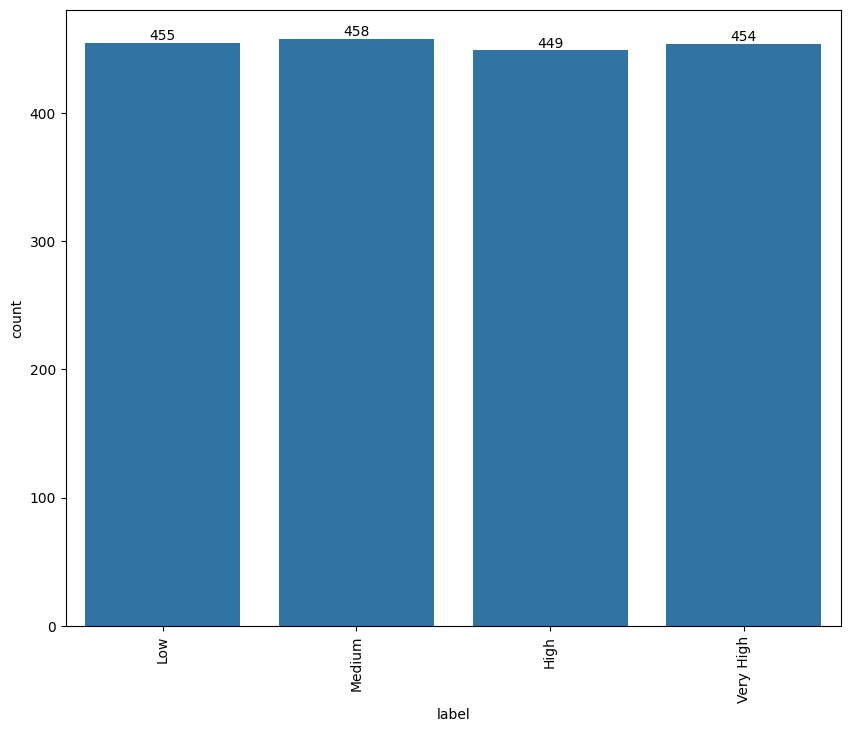

In [31]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='label')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [61]:
df

,Sample Date & Time,Sample Id (Grid),Latitude (Centre of grid),Longitude (Centre of grid),VH-pol,VV-pol,SM1 (%),Crop Name,label
0,2022-06-18 00:00:00,1A,22.526048,72.765011,-19.3557,-13.54610,4.6,Fallow,Low
1,2022-06-18 00:00:00,1B,22.525481,72.765028,-17.1605,-10.46910,7.2,Pearl Millet,Low
2,2022-06-18 00:00:00,1C,22.525423,72.765663,-17.8729,-9.98927,6.4,Fallow,Low
3,2022-06-18 00:00:00,1D,22.525999,72.765663,-17.7906,-11.93460,9.6,Lemon,Low
4,2022-06-18 00:00:00,1E,22.525563,72.765399,-17.3646,-10.73270,3.9,Fallow,Low
...,...,...,...,...,...,...,...,...,...
135,2023-03-19 00:00:00,28A,22.523697,72.767969,-16.7871,-11.17010,50.0,Wheat,Very High
136,2023-03-19 00:00:00,28B,22.523710,72.768582,-17.2167,-12.15740,50.0,Wheat,Very High
137,2023-03-19 00:00:00,28C,22.524262,72.768629,-17.7785,-10.37820,50.0,Tobacco,Very High
138,2023-03-19 00:00:00,28D,22.524252,72.767989,-16.6607,-10.62890,50.0,Tobacco,Very High


In [62]:
df[['VH-pol', 'VV-pol', 'SM1 (%)', 'Crop Name', 'label']].to_csv(DATA_PATH / 'sentinel-1-processed.csv', index=False)

In [4]:
from constants import EOS_FILE, SENTINEL_FILE, DATA_PATH
import pandas as pd

pd.read_csv(DATA_PATH / SENTINEL_FILE)

,VH-pol,VV-pol,SM1 (%),Crop Name,label
0,-19.3557,-13.54610,4.6,Fallow,Low
1,-17.1605,-10.46910,7.2,Pearl Millet,Low
2,-17.8729,-9.98927,6.4,Fallow,Low
3,-17.7906,-11.93460,9.6,Lemon,Low
4,-17.3646,-10.73270,3.9,Fallow,Low
...,...,...,...,...,...
1811,-16.7871,-11.17010,50.0,Wheat,Very High
1812,-17.2167,-12.15740,50.0,Wheat,Very High
1813,-17.7785,-10.37820,50.0,Tobacco,Very High
1814,-16.6607,-10.62890,50.0,Tobacco,Very High
